<a href="https://colab.research.google.com/github/AlyssonBaumgarten/reconhecimento/blob/main/C%C3%B3pia_de_C%C3%B3pia_de_aula3a_multiclasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_wine
dataset = load_wine()
X, y = dataset.data, dataset.target
X.shape, y.shape

((178, 13), (178,))

In [3]:
set(y)

{0, 1, 2}

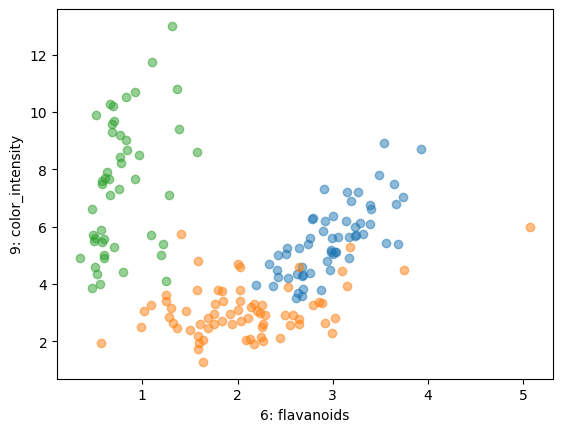

In [4]:
import matplotlib.pyplot as plt
i, j = 6, 9
Xtmp = X[:,[i,j]]
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)
plt.show()

In [5]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
class knn(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    self.X = X
    self.y = y
  def distancia(self, x):
    diferenca = self.X - x
    quadrado = diferenca**2
    soma = np.sum(quadrado, axis=1)
    raiz = np.sqrt(soma)
    return raiz
  def predict(self, X):
    ypred = np.empty((X.shape[0],))
    for i in range(X.shape[0]):
      distancias = self.distancia(X[i])
      vizinho = np.argmin((distancias))
      ypred[i] = self.y[vizinho]
    return ypred

modelo = knn()
modelo.fit(Xtmp, y)
ypred = modelo.predict(Xtmp)
sum(ypred==y)/len(y)


1.0

In [6]:
from sklearn.metrics import accuracy_score
modelo = knn()
modelo.fit(X, y)
accuracy_score(y, modelo.predict(X))

1.0

In [7]:
from sklearn.model_selection import cross_validate
cross_validate(knn(), X, y)

{'fit_time': array([6.41345978e-05, 3.67164612e-05, 3.36170197e-05, 3.17096710e-05,
        4.19616699e-05]),
 'score_time': array([0.00109339, 0.00091195, 0.0008862 , 0.00084209, 0.00080109]),
 'test_score': array([0.80555556, 0.63888889, 0.66666667, 0.68571429, 0.82857143])}

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3)
modelo = knn()
modelo.fit(Xtr, ytr)
ypred = modelo.predict(Xte)
confusion_matrix(yte, ypred)

array([[16,  0,  1],
       [ 0, 16,  8],
       [ 0,  1, 12]])

In [9]:
from sklearn.metrics import f1_score
f1_score(yte, ypred, average="macro")

0.8186890425053983

In [10]:
sum(y==0), sum(y==1), sum(y==2)

(59, 71, 48)

In [11]:
cross_validate(knn(), X, y, scoring="f1_macro")

{'fit_time': array([7.96318054e-05, 6.46114349e-05, 7.46250153e-05, 5.05447388e-05,
        5.69820404e-05]),
 'score_time': array([0.00346446, 0.00234437, 0.00179195, 0.00389862, 0.00266171]),
 'test_score': array([0.80371184, 0.63163031, 0.65010893, 0.67301587, 0.80277778])}

In [12]:
cross_validate(knn(), X, y, scoring=['precision_macro', 'recall_macro'])

{'fit_time': array([7.82012939e-05, 4.19616699e-05, 3.62396240e-05, 3.43322754e-05,
        3.29017639e-05]),
 'score_time': array([0.00436068, 0.00240111, 0.00230527, 0.00221872, 0.00242782]),
 'test_precision_macro': array([0.8022533 , 0.64814815, 0.7       , 0.74603175, 0.80903541]),
 'test_recall_macro': array([0.81031746, 0.64444444, 0.64126984, 0.65608466, 0.80740741])}

In [13]:
from sklearn.model_selection import RepeatedStratifiedKFold
cross_validate(knn(), X, y, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
               cv=RepeatedStratifiedKFold())

{'fit_time': array([7.03334808e-05, 6.58035278e-05, 5.93662262e-05, 3.76701355e-05,
        3.48091125e-05, 3.60012054e-05, 3.43322754e-05, 6.05583191e-05,
        4.17232513e-05, 3.95774841e-05, 3.60012054e-05, 3.50475311e-05,
        3.45706940e-05, 3.52859497e-05, 3.74317169e-05, 3.50475311e-05,
        3.43322754e-05, 4.22000885e-05, 4.00543213e-05, 3.43322754e-05,
        3.48091125e-05, 3.43322754e-05, 3.48091125e-05, 3.48091125e-05,
        3.38554382e-05, 5.34057617e-05, 3.40938568e-05, 3.36170197e-05,
        3.38554382e-05, 3.38554382e-05, 3.62396240e-05, 4.33921814e-05,
        4.62532043e-05, 5.10215759e-05, 4.83989716e-05, 4.41074371e-05,
        4.43458557e-05, 4.26769257e-05, 2.63690948e-04, 3.83853912e-05,
        3.67164612e-05, 3.57627869e-05, 3.60012054e-05, 3.55243683e-05,
        3.52859497e-05, 3.60012054e-05, 3.38554382e-05, 3.50475311e-05,
        4.17232513e-05, 3.48091125e-05]),
 'score_time': array([0.00691628, 0.00615811, 0.00429106, 0.00332952, 0.00317597,


In [16]:
from sklearn.linear_model import Perceptron
modelos = cross_validate(Perceptron(), X, y,
                        cv=RepeatedStratifiedKFold(random_state=42),
                        return_estimator=True)
modelos['test_score']

array([0.58333333, 0.58333333, 0.61111111, 0.57142857, 0.28571429,
       0.55555556, 0.58333333, 0.66666667, 0.51428571, 0.45714286,
       0.75      , 0.38888889, 0.58333333, 0.68571429, 0.42857143,
       0.52777778, 0.55555556, 0.61111111, 0.54285714, 0.74285714,
       0.41666667, 0.5       , 0.63888889, 0.54285714, 0.4       ,
       0.47222222, 0.47222222, 0.61111111, 0.62857143, 0.62857143,
       0.63888889, 0.44444444, 0.55555556, 0.57142857, 0.71428571,
       0.72222222, 0.63888889, 0.63888889, 0.51428571, 0.71428571,
       0.63888889, 0.72222222, 0.55555556, 0.62857143, 0.51428571,
       0.66666667, 0.41666667, 0.61111111, 0.71428571, 0.48571429])

In [17]:
modelo, sum(modelos['test_score'])/50

(Perceptron(), 0.572936507936508)

In [18]:

modelo = modelos['estimator'][10]
modelos['test_score'][10]

0.75

In [19]:
modelo.intercept_

array([-148.,   88.,   26.])

In [26]:
modelo.coef_[:,[6,9]]

array([[ 250.25    , -753.359999],
       [ 326.14    , -632.879996],
       [-343.8     ,  905.339994]])

**Plotar hiperplanos separadores de classificador linear**

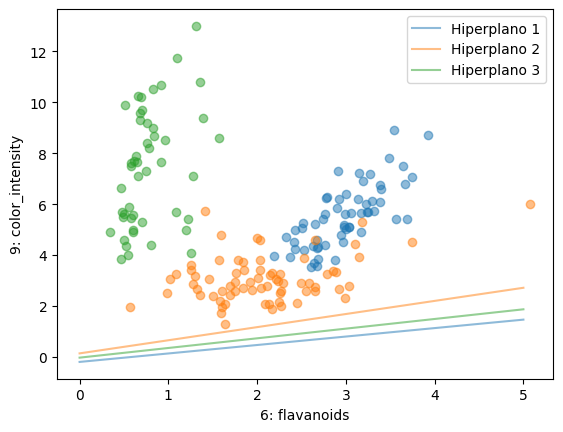

In [28]:
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.scatter(X[:,i][y==k], X[:,j][y==k], alpha=0.5)
  w = modelo.coef_[:,[i,j]][k]
  a = -w[0] / w[1]
  xx = np.linspace(0, 5)
  yy = a * xx - (modelo.intercept_[k]) / w[1]
  plt.plot(xx, yy, label=f'Hiperplano {k+1}', alpha=0.5)

plt.legend()
plt.show()

0.8489682539682538


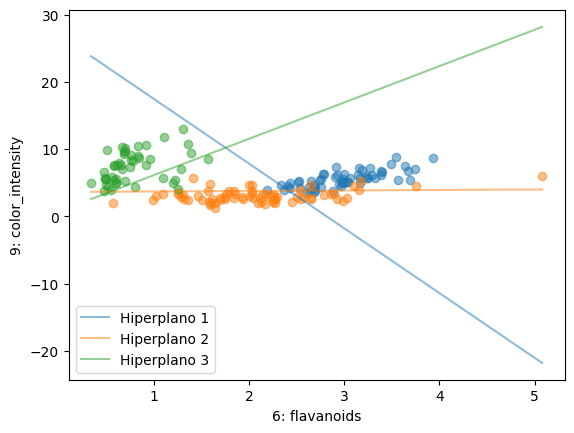

In [32]:
# Modelo fit Com 2 caracteristicas para a classificação

from sklearn.datasets import load_wine
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

i, j = 6, 9
X2, y2 = dataset.data[:, [i,j]], dataset.target

modelos2 = cross_validate(Perceptron(), X2, y2,
                        cv=RepeatedStratifiedKFold(random_state=42),
                        return_estimator=True)

print(sum(modelos2['test_score'])/50)

modelo2 = modelos2['estimator'][0]

xmin, xmax = min(X2[:,0]), max(X2[:,0])

plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
    plt.scatter(X2[:,0][y==k], X2[:,1][y==k], alpha=0.5)
    w = modelo2.coef_[k]
    a = -w[0] / w[1]
    xx = np.linspace(xmin, xmax)
    yy = a * xx - (modelo2.intercept_[k]) / w[1]
    plt.plot(xx, yy, label=f'Hiperplano {k+1}', alpha=0.5)

plt.legend()
plt.show()


0.9791746031746028


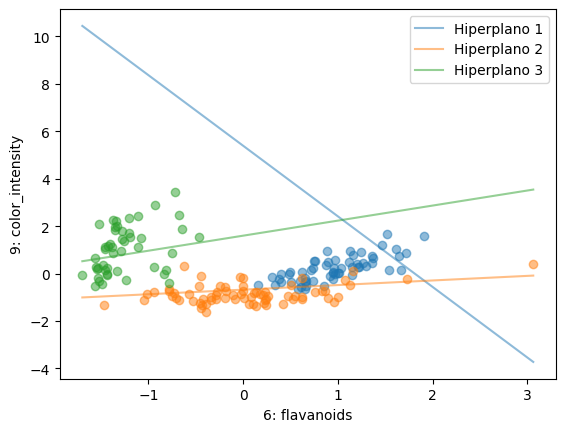

In [39]:
# Normalização dos valores
from sklearn.datasets import load_wine
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

i, j = 6, 9
dataset = load_wine()
X, y = dataset.data, dataset.target

Xnorm = StandardScaler().fit_transform(X)

modelos3 = cross_validate(SGDClassifier(), Xnorm, y,
                        cv=RepeatedStratifiedKFold(random_state=42),
                        return_estimator=True)

print(sum(modelos3['test_score'])/50)


modelo3 = modelos3['estimator'][0]


xmin, xmax = min(Xnorm[:,i]), max(Xnorm[:,i])


plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
    plt.scatter(Xnorm[:,i][y==k], Xnorm[:,j][y==k], alpha=0.5)
    w = modelo3.coef_[:,[i,j]][k]
    a = -w[0] / w[1]
    xx = np.linspace(xmin, xmax)
    yy = a * xx - (modelo3.intercept_[k]) / w[1]
    plt.plot(xx, yy, label=f'Hiperplano {k+1}', alpha=0.5)

plt.legend()
plt.show()
